In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

y = digits["target"] == 9

X_train, X_test, y_train, y_test = train_test_split(digits["data"], y, stratify=y, random_state=0)


In [5]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: ", np.unique(pred_most_frequent))
print("Test score: ", dummy_majority.score(X_test, y_test))

Unique predicted labels:  [False]
Test score:  0.9


In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test, y_test)

0.9355555555555556

In [7]:
dummy = DummyClassifier(strategy="stratified").fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
dummy.score(X_test, y_test)

0.8355555555555556

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, max_iter=200).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9822222222222222

In [9]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)


# 陰性,   偽陽性
# 偽陰性, 陽性

# TN, FP
# FN, TP

# TNはTrue negative, FNはFalse negative
# FPはFalse positive, TPはTrue positive
print(confusion)

[[402   3]
 [  5  40]]


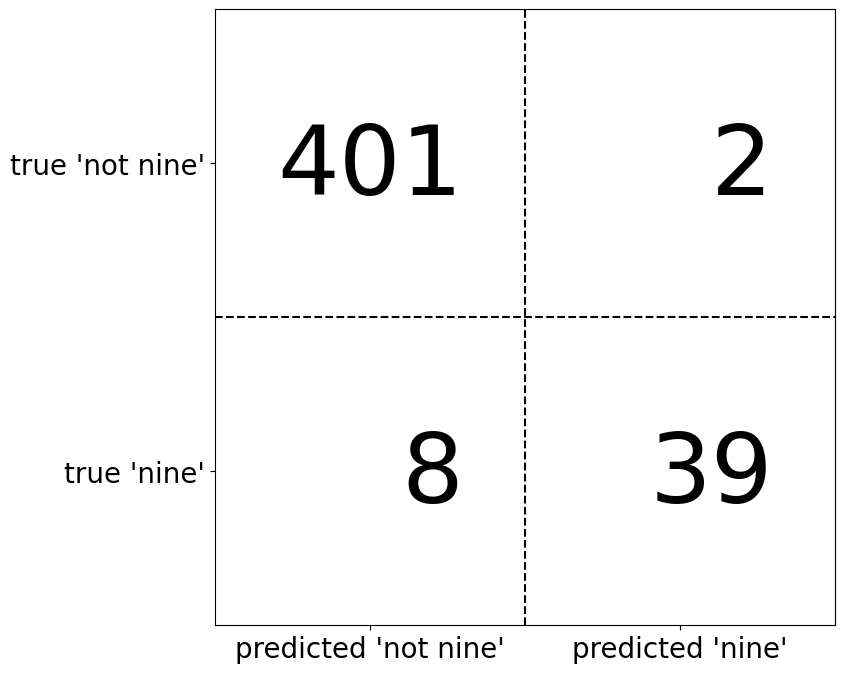

In [10]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

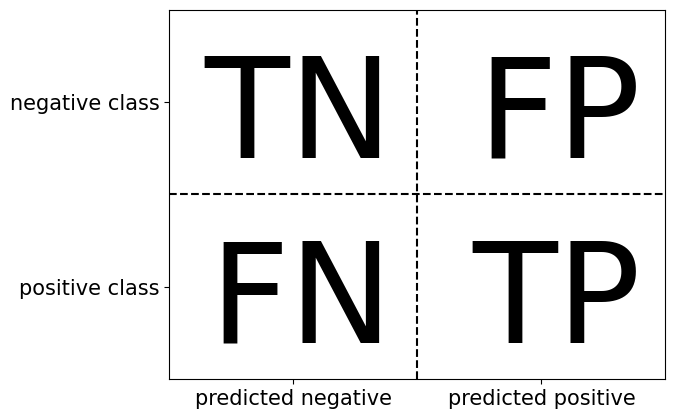

In [11]:
mglearn.plots.plot_binary_confusion_matrix()

In [12]:
print("Most frequent class\n", confusion_matrix(y_test, pred_most_frequent))  # pred_most_frequentはdummyclassfierの最も多いクラスだけを選ぶもの
print("Dummy model\n", confusion_matrix(y_test, pred_dummy))  # pred_dummyは訓練データのクラス分布に基づいてランダムに予測するもの
print("Decision tree\n", confusion_matrix(y_test, pred_tree))
print("Logistic Regression\n", confusion_matrix(y_test, pred_logreg))

Most frequent class
 [[405   0]
 [ 45   0]]
Dummy model
 [[371  34]
 [ 42   3]]
Decision tree
 [[393  12]
 [ 17  28]]
Logistic Regression
 [[402   3]
 [  5  40]]


In [13]:
from sklearn.metrics import f1_score

print("f1 score most frequent: ", f1_score(y_test, pred_most_frequent))
print("f1 score dummy: ", f1_score(y_test, pred_dummy))
print("f1 score tree: ", f1_score(y_test, pred_tree))
print("f1 score logistic regression: ", f1_score(y_test, pred_logreg))

f1 score most frequent:  0.0
f1 score dummy:  0.07317073170731707
f1 score tree:  0.6588235294117647
f1 score logistic regression:  0.9090909090909091


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                      target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.95       405
        nine       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450



c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.92      0.91       405
        nine       0.08      0.07      0.07        45

    accuracy                           0.83       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.82      0.83      0.82       450



In [16]:
print(classification_report(y_test, pred_tree))
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       405
        True       0.70      0.62      0.66        45

    accuracy                           0.94       450
   macro avg       0.83      0.80      0.81       450
weighted avg       0.93      0.94      0.93       450

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       405
        True       0.93      0.89      0.91        45

    accuracy                           0.98       450
   macro avg       0.96      0.94      0.95       450
weighted avg       0.98      0.98      0.98       450



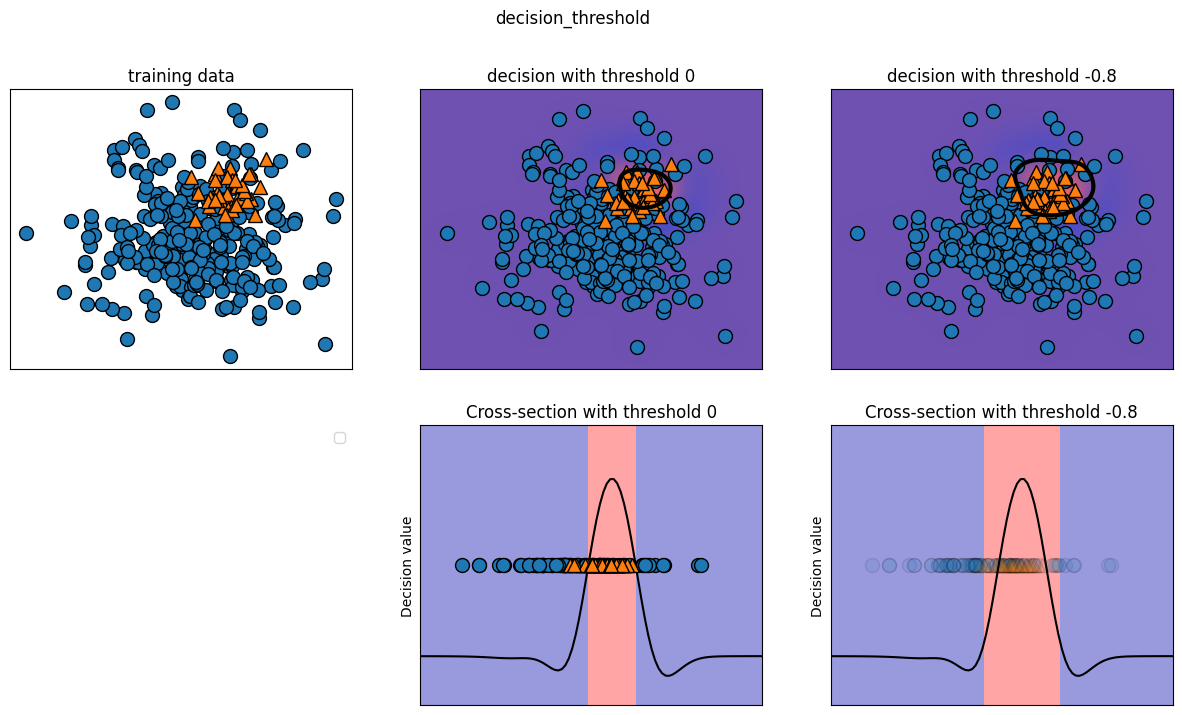

In [17]:
from sklearn.svm import SVC
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [19]:
svc.decision_function(X_test)

array([-0.96115932, -1.00295907, -0.98717612, -0.89179943, -0.90761813,
       -0.99988838, -0.93671048,  0.35885187, -0.96994451, -0.99885653,
       -0.93662128, -0.27694237, -0.9957637 , -0.72471092, -0.3989441 ,
       -0.9735448 , -0.99305014, -0.87933226, -0.95443829, -0.97446446,
       -0.33782342, -1.01991898, -0.94097354, -1.00623984, -0.97971666,
       -0.98776941, -1.05701633, -1.01286028,  0.28160546, -0.89182676,
       -0.99746313,  0.97343213,  0.62416324, -0.91810974, -0.98286531,
       -0.93546274, -1.00128398, -0.99061455, -0.89186307, -1.00990068,
       -0.9752751 , -0.94926586, -0.99954157, -0.89180113, -0.44194907,
       -0.96064018,  0.15513355, -0.30232378, -0.90196211,  0.54764971,
       -0.9991082 , -0.61829767, -0.90288061, -1.00016461,  0.61187843,
       -0.91740768, -0.73357046, -0.96224877, -0.97325665, -1.00066294,
       -0.55351003, -0.99939871, -1.00531948, -0.56034941, -0.98906346,
       -0.94969753, -0.98677507, -1.01896937, -0.90805923,  0.99

In [20]:
y_pred_lower_threshold = svc.decision_function(X_test) >= -0.66

In [21]:
y_pred_lower_threshold = svc.decision_function(X_test) >= -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



In [22]:
y_pred_lower_threshold = svc.decision_function(X_test) >= -0.66
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       104
           1       0.31      0.89      0.46         9

    accuracy                           0.83       113
   macro avg       0.65      0.86      0.68       113
weighted avg       0.93      0.83      0.87       113



Text(0, 0.5, 'Recall')

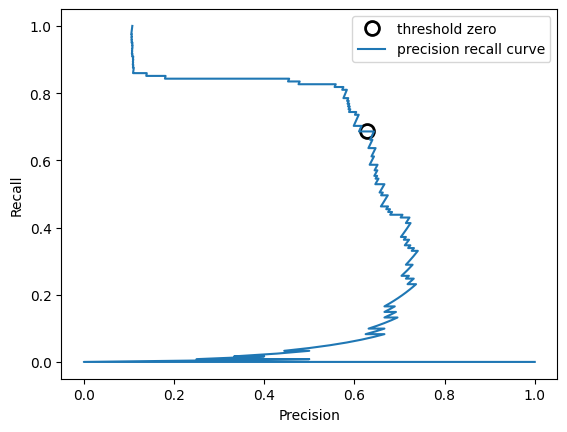

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))


X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.5).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10,
         label="threshold zero", fillstyle="none", c="k", mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Recall")

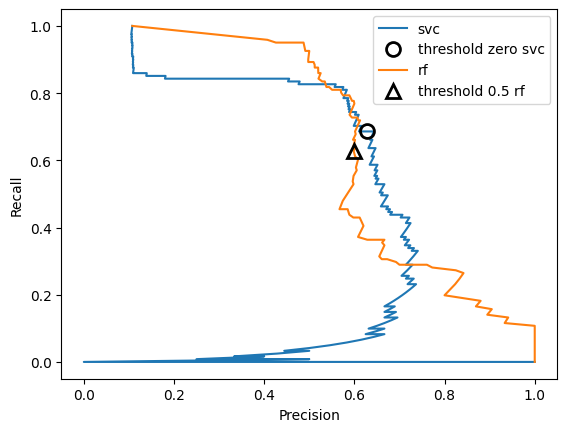

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero svc", fillstyle="none", c="k", mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_defalu_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_defalu_rf], recall_rf[close_defalu_rf], "^", c="k",
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [25]:
print(f1_score(y_test, rf.predict(X_test)))
print(f1_score(y_test, svc.predict(X_test)))

0.6097560975609756
0.6561264822134387


In [26]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print(ap_rf, ap_svc)

0.659559370099291 0.5671127001259444


Text(0, 0.5, 'precision')

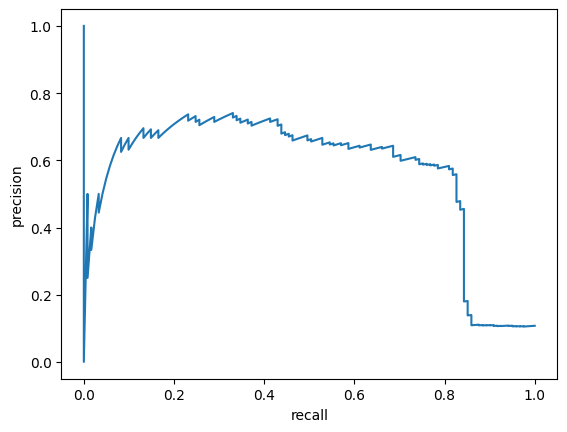

In [27]:
import seaborn as sns

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

In [28]:
from sklearn.metrics import average_precision_score

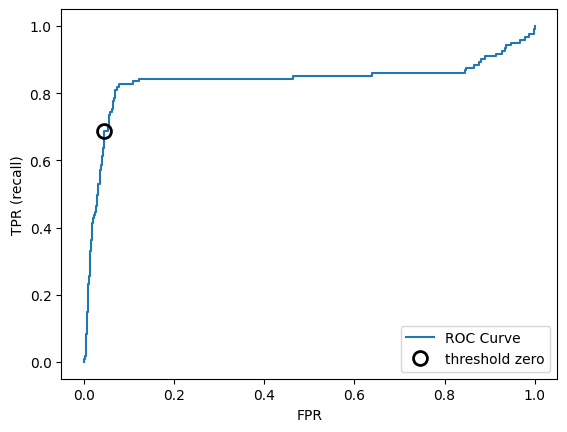

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.ylabel("TPR (recall)")
plt.xlabel("FPR")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10,
         label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

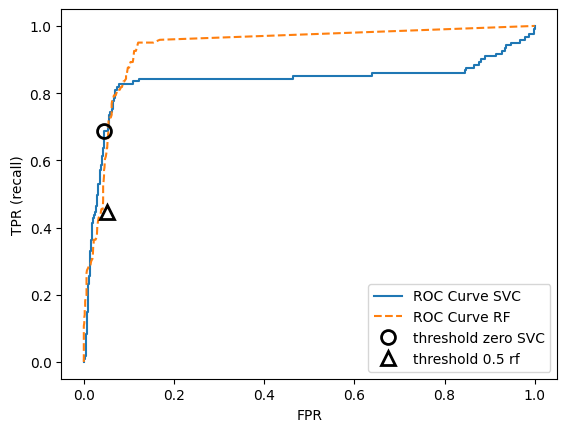

In [35]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr_svc, tpr_svc, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF", linestyle="--")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero_svc = np.argmin(np.abs(thresholds_svc))

plt.plot(fpr_svc[close_zero_svc], tpr_svc[close_zero_svc], "o", markersize=10,
         label="threshold zero SVC", fillstyle="none", c="k", mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], "^", markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c="k", mew=2)


plt.legend(loc=4)

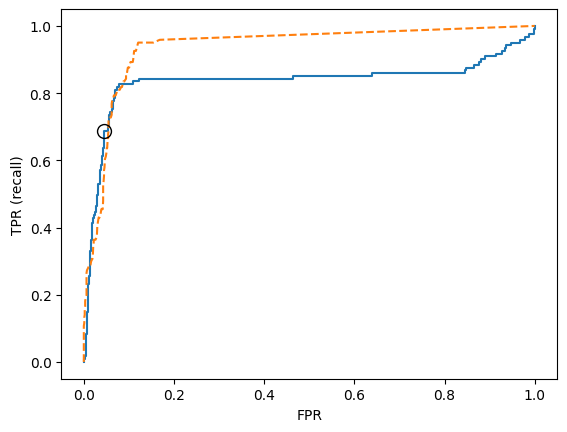

In [44]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr_svc, tpr_svc, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF", linestyle="--")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


close_zero_svc = np.argmin(np.abs(thresholds_svc))

plt.plot(fpr_svc[close_zero_svc], tpr_svc[close_zero_svc], marker="o", c="k", fillstyle="none", markersize=10)

In [34]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: ", rf_auc)
print("AUC for SVC: ", svc_auc)

AUC for Random Forest:  0.9366953672911659
AUC for SVC:  0.8356573705179284


In [46]:
digits["target"].shape

(1797,)

gamma = 1, accuracy = 0.8955555555555555, AUC = 0.500000000
gamma = 0.05, accuracy = 0.8955555555555555, AUC = 0.999208067
gamma = 0.01, accuracy = 0.8955555555555555, AUC = 0.999524840


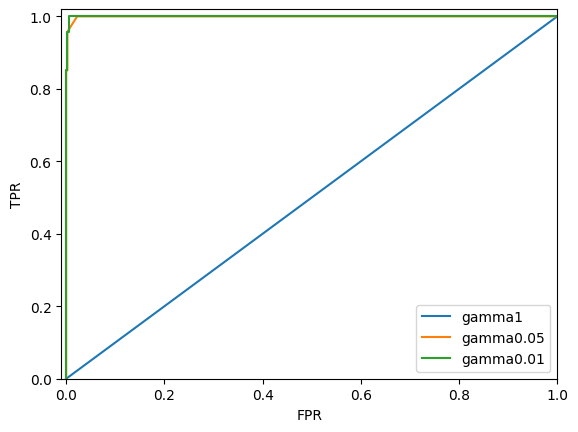

In [ ]:
y = digits["target"] == 9

X_train, X_test, y_train, y_test = train_test_split(digits["data"], y, random_state=0)

plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f"gamma = {gamma}, accuracy = {accuracy}, AUC = {auc}")
    plt.plot(fpr, tpr, label=f"gamma{gamma}")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

